In [3]:
import pandas as pd

# Convert training triplets
train_df = pd.read_csv("triplets_train.txt", sep=" ", header=None, names=["anchor", "positive", "negative"])
train_df.to_csv("triplets_train.csv", index=False)

# Convert testing triplets
test_df = pd.read_csv("triplets_test.txt", sep=" ", header=None, names=["anchor", "positive", "negative"])
test_df.to_csv("triplets_test.csv", index=False)

print("✅ TXT files converted to CSV successfully!")


✅ TXT files converted to CSV successfully!


In [7]:
import pandas as pd

train_df = pd.read_csv("triplets_train.csv")
test_df = pd.read_csv("triplets_test.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
train_df.head()


Train shape: (1000, 3)
Test shape: (500, 3)


,anchor,positive,negative
0,/kaggle/input/mini-vggface2/mini_train/n001483...,/kaggle/input/mini-vggface2/mini_train/n001483...,/kaggle/input/mini-vggface2/mini_train/n008192...
1,/kaggle/input/mini-vggface2/mini_train/n003552...,/kaggle/input/mini-vggface2/mini_train/n003552...,/kaggle/input/mini-vggface2/mini_train/n002272...
2,/kaggle/input/mini-vggface2/mini_train/n000698...,/kaggle/input/mini-vggface2/mini_train/n000698...,/kaggle/input/mini-vggface2/mini_train/n008365...
3,/kaggle/input/mini-vggface2/mini_train/n000134...,/kaggle/input/mini-vggface2/mini_train/n000134...,/kaggle/input/mini-vggface2/mini_train/n002164...
4,/kaggle/input/mini-vggface2/mini_train/n004305...,/kaggle/input/mini-vggface2/mini_train/n004305...,/kaggle/input/mini-vggface2/mini_train/n001151...


In [8]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [9]:
# Load triplet CSV files
train_df = pd.read_csv("triplets_train.csv")
test_df = pd.read_csv("triplets_test.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Show first few rows
train_df.head()


Train shape: (1000, 3)
Test shape: (500, 3)


,anchor,positive,negative
0,/kaggle/input/mini-vggface2/mini_train/n001483...,/kaggle/input/mini-vggface2/mini_train/n001483...,/kaggle/input/mini-vggface2/mini_train/n008192...
1,/kaggle/input/mini-vggface2/mini_train/n003552...,/kaggle/input/mini-vggface2/mini_train/n003552...,/kaggle/input/mini-vggface2/mini_train/n002272...
2,/kaggle/input/mini-vggface2/mini_train/n000698...,/kaggle/input/mini-vggface2/mini_train/n000698...,/kaggle/input/mini-vggface2/mini_train/n008365...
3,/kaggle/input/mini-vggface2/mini_train/n000134...,/kaggle/input/mini-vggface2/mini_train/n000134...,/kaggle/input/mini-vggface2/mini_train/n002164...
4,/kaggle/input/mini-vggface2/mini_train/n004305...,/kaggle/input/mini-vggface2/mini_train/n004305...,/kaggle/input/mini-vggface2/mini_train/n001151...


📸 Selected image path: C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\mini_train\n002359\0585_01.jpg
✅ Image loaded successfully! Shape: (781, 600, 3)


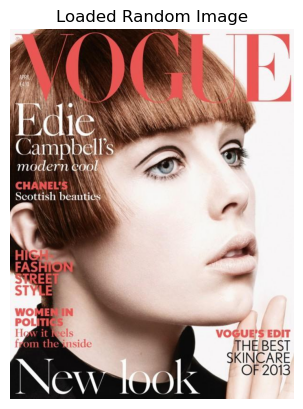

In [12]:
import os, random, cv2
import matplotlib.pyplot as plt

# 🗂️ Base folder jahan tumhara dataset hai
base_path = r"C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\mini_train"

# kisi random person ke folder se ek image choose karo
person_folder = random.choice(os.listdir(base_path))
img_file = random.choice(os.listdir(os.path.join(base_path, person_folder)))

# full image path
img_path = os.path.join(base_path, person_folder, img_file)
print("📸 Selected image path:", img_path)

# image load karo
img = cv2.imread(img_path)
if img is None:
    print("⚠️ Image not loaded — check the path or folder name.")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print("✅ Image loaded successfully! Shape:", img.shape)
    plt.imshow(img_rgb)
    plt.title("Loaded Random Image")
    plt.axis("off")
    plt.show()


📁 Total folders: 100
🔹 Example folders: ['n000035', 'n000128', 'n000134', 'n000253', 'n000358', 'n000482', 'n000500', 'n000558', 'n000684', 'n000698']
✅ Selected image path: C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\mini_train\n001483\0019_01.jpg


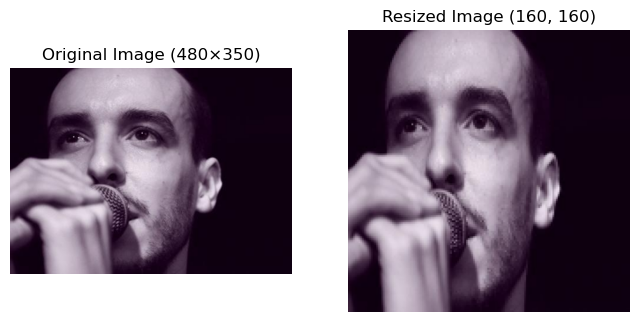

In [23]:
import os
import cv2
import matplotlib.pyplot as plt

# 🗂️ Base dataset path
base_path = r"C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\mini_train"

# 🔍 Step 1: Show available folders (each folder = one person)
folders = os.listdir(base_path)
print("📁 Total folders:", len(folders))
print("🔹 Example folders:", folders[:10])  # sirf first 10 dikhayega

# 🔹 Step 2: Choose any safe folder name from the printed list below
# ⚠️ Replace "n001483" with any folder name from your output
person_folder = "n001483"  

# 📸 Step 3: Get first image from that folder
img_file = os.listdir(os.path.join(base_path, person_folder))[0]
img_path = os.path.join(base_path, person_folder, img_file)
print("✅ Selected image path:", img_path)

# 🔹 Step 4: Load and visualize
img = cv2.imread(img_path)
if img is None:
    print("⚠️ Error: Image not found! Check folder name or file path.")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 📏 Resize to 160×160
    IMG_SIZE = (160, 160)
    resized_img = cv2.resize(img_rgb, IMG_SIZE)

    # 🔍 Compare original vs resized
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.imshow(img_rgb)
    plt.title(f"Original Image ({img.shape[1]}×{img.shape[0]})")
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(resized_img)
    plt.title(f"Resized Image {IMG_SIZE}")
    plt.axis("off")
    plt.show()


In [24]:
import os
import cv2
from tqdm import tqdm

# 🗂️ Base input and output folders
input_base = r"C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\mini_train"
output_base = r"C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\mini_train_resized"

# 📏 Target image size
IMG_SIZE = (160, 160)

# ✅ Create output folder if not exists
os.makedirs(output_base, exist_ok=True)

# 🔁 Loop over all person folders
for person_folder in tqdm(os.listdir(input_base), desc="Resizing folders"):
    person_path = os.path.join(input_base, person_folder)
    if not os.path.isdir(person_path):
        continue

    # Create corresponding output folder
    output_person_path = os.path.join(output_base, person_folder)
    os.makedirs(output_person_path, exist_ok=True)

    # Loop over all images inside that folder
    for file_name in os.listdir(person_path):
        input_img_path = os.path.join(person_path, file_name)
        output_img_path = os.path.join(output_person_path, file_name)

        # Read and resize
        img = cv2.imread(input_img_path)
        if img is None:
            continue  # skip corrupt or invalid files
        img_resized = cv2.resize(img, IMG_SIZE)

        # Save resized image
        cv2.imwrite(output_img_path, img_resized)

print("✅ All images resized successfully!")
print("📁 Saved in:", output_base)


Resizing folders: 100%|██████████████████████████████████████████████████████████████| 100/100 [00:17<00:00,  5.63it/s]

✅ All images resized successfully!
📁 Saved in: C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\mini_train_resized


In [25]:
import os
import cv2
from tqdm import tqdm

# 🗂️ Base input and output folders for TEST set
input_base = r"C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\mini_test"
output_base = r"C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\mini_test_resized"

# 📏 Target image size
IMG_SIZE = (160, 160)

# ✅ Create output folder if not exists
os.makedirs(output_base, exist_ok=True)

# 🔁 Loop over all person folders
for person_folder in tqdm(os.listdir(input_base), desc="Resizing test folders"):
    person_path = os.path.join(input_base, person_folder)
    if not os.path.isdir(person_path):
        continue

    # Create corresponding output folder
    output_person_path = os.path.join(output_base, person_folder)
    os.makedirs(output_person_path, exist_ok=True)

    # Loop over all images inside that folder
    for file_name in os.listdir(person_path):
        input_img_path = os.path.join(person_path, file_name)
        output_img_path = os.path.join(output_person_path, file_name)

        # Read and resize
        img = cv2.imread(input_img_path)
        if img is None:
            continue  # skip corrupt or invalid files
        img_resized = cv2.resize(img, IMG_SIZE)

        # Save resized image
        cv2.imwrite(output_img_path, img_resized)

print("✅ All TEST images resized successfully!")
print("📁 Saved in:", output_base)


Resizing test folders: 100%|███████████████████████████████████████████████████████████| 50/50 [00:08<00:00,  6.08it/s]

✅ All TEST images resized successfully!
📁 Saved in: C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\mini_test_resized


In [26]:
import pandas as pd

# 🔹 Load original CSV files
train_df = pd.read_csv("triplets_train.csv")
test_df = pd.read_csv("triplets_test.csv")

# 🔹 Replace old folder name with resized version
train_df = train_df.replace("mini_train", "mini_train_resized", regex=True)
test_df = test_df.replace("mini_test", "mini_test_resized", regex=True)

# 🔹 Save updated CSVs
train_df.to_csv("triplets_train_resized.csv", index=False)
test_df.to_csv("triplets_test_resized.csv", index=False)

print("✅ Updated CSVs saved successfully!")


✅ Updated CSVs saved successfully!


In [27]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# 🗂️ Input (resized) and Output folders
input_base = r"C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\mini_train_resized"
output_base = r"C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\mini_train_normalized"

# Create output folder if not exists
os.makedirs(output_base, exist_ok=True)

# 🔁 Loop through all folders and images
for person_folder in tqdm(os.listdir(input_base), desc="Normalizing images"):
    person_path = os.path.join(input_base, person_folder)
    if not os.path.isdir(person_path):
        continue

    output_person_path = os.path.join(output_base, person_folder)
    os.makedirs(output_person_path, exist_ok=True)

    for file_name in os.listdir(person_path):
        input_img_path = os.path.join(person_path, file_name)
        output_img_path = os.path.join(output_person_path, file_name)

        img = cv2.imread(input_img_path)
        if img is None:
            continue

        # 🔹 Convert to float32 and normalize (0–1 range)
        img_normalized = img.astype('float32') / 255.0

        # ⚠️ Optional: save as .npy (faster for ML models)
        np.save(output_img_path.replace('.jpg', '.npy'), img_normalized)

print("✅ Normalization complete!")
print("📁 Saved normalized images in:", output_base)


Normalizing images: 100%|████████████████████████████████████████████████████████████| 100/100 [00:23<00:00,  4.34it/s]

✅ Normalization complete!
📁 Saved normalized images in: C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\mini_train_normalized


In [29]:
import os
import cv2
import numpy as np
from tqdm import tqdm

# 🗂️ Paths
train_dir = r"C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\mini_train_resized"
test_dir  = r"C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\mini_test_resized"

IMG_SIZE = (160, 160)

def load_and_normalize_images(base_dir):
    images = []
    labels = []
    
    for person in tqdm(os.listdir(base_dir), desc=f"Processing {os.path.basename(base_dir)}"):
        person_path = os.path.join(base_dir, person)
        if not os.path.isdir(person_path):
            continue
        for img_file in os.listdir(person_path):
            img_path = os.path.join(person_path, img_file)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, IMG_SIZE)
            img = img.astype('float32') / 255.0  # 🔹 Normalize to [0,1]
            images.append(img)
            labels.append(person)
    
    return np.array(images), np.array(labels)

# 🔹 Load + normalize training images
train_images, train_labels = load_and_normalize_images(train_dir)

# 🔹 Load + normalize testing images
test_images, test_labels = load_and_normalize_images(test_dir)

# 💾 Save normalized arrays
np.save("train_images.npy", train_images)
np.save("train_labels.npy", train_labels)
np.save("test_images.npy", test_images)
np.save("test_labels.npy", test_labels)

print("✅ Normalization complete & saved as .npy files!")
print(f"Train shape: {train_images.shape}")
print(f"Test shape:  {test_images.shape}")


Processing mini_test_resized: 100%|████████████████████████████████████████████████████| 50/50 [00:08<00:00,  6.13it/s]


✅ Normalization complete & saved as .npy files!
Train shape: (1000, 160, 160, 3)
Test shape:  (500, 160, 160, 3)


In [1]:
import os
import pandas as pd

# 🗂️ Base folder jahan CSV aur images hain
base_folder = r"C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)"

# ✅ CSV file paths (raw strings for Windows paths)
train_csv = os.path.join(base_folder, "triplets_train.csv")
test_csv  = os.path.join(base_folder, "triplets_test.csv")

# ⚡ Function to safely load triplets CSV
def load_triplets(csv_path, base_folder):
    if not os.path.exists(csv_path):
        raise FileNotFoundError(f"❌ File not found: {csv_path}")
    
    df = pd.read_csv(csv_path)
    anchors, positives, negatives = [], [], []

    print(f"📥 Loading triplets from {os.path.basename(csv_path)} ...")
    for idx, row in df.iterrows():
        a_path = os.path.join(base_folder, row['anchor'])
        p_path = os.path.join(base_folder, row['positive'])
        n_path = os.path.join(base_folder, row['negative'])
        
        # Check if images exist
        for path in [a_path, p_path, n_path]:
            if not os.path.exists(path):
                raise FileNotFoundError(f"❌ Image not found: {path}")

        anchors.append(a_path)
        positives.append(p_path)
        negat


In [4]:
import os

train_folder = r"C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)"
print("📂 Files in folder:")
print(os.listdir(train_folder))


📂 Files in folder:
['combine folder.zip', 'mini_test', 'mini_test_resized', 'mini_train', 'mini_train_normalized', 'mini_train_resized', 'triplets_test.txt', 'triplets_train.txt']


In [6]:
with open(train_txt, 'r') as f:
    for _ in range(5):
        print(f.readline())


/kaggle/input/mini-vggface2/mini_train/n001483/0032_03.jpg /kaggle/input/mini-vggface2/mini_train/n001483/0131_01.jpg /kaggle/input/mini-vggface2/mini_train/n008192/0190_03.jpg

/kaggle/input/mini-vggface2/mini_train/n003552/0087_01.jpg /kaggle/input/mini-vggface2/mini_train/n003552/0001_02.jpg /kaggle/input/mini-vggface2/mini_train/n002272/0087_03.jpg

/kaggle/input/mini-vggface2/mini_train/n000698/0162_01.jpg /kaggle/input/mini-vggface2/mini_train/n000698/0131_01.jpg /kaggle/input/mini-vggface2/mini_train/n008365/0152_01.jpg

/kaggle/input/mini-vggface2/mini_train/n000134/0215_02.jpg /kaggle/input/mini-vggface2/mini_train/n000134/0506_01.jpg /kaggle/input/mini-vggface2/mini_train/n002164/0087_01.jpg

/kaggle/input/mini-vggface2/mini_train/n004305/0019_01.jpg /kaggle/input/mini-vggface2/mini_train/n004305/0087_01.jpg /kaggle/input/mini-vggface2/mini_train/n001151/0038_01.jpg



In [9]:
import os

dataset_path = "/kaggle/input/mini-vggface2"
for root, dirs, files in os.walk(dataset_path):
    for f in files:
        print(os.path.join(root, f))


In [10]:
import os
import numpy as np
from PIL import Image
import random

# 🗂️ Dataset paths (local)
train_folder = r"C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\mini_train"
test_folder  = r"C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\mini_test"

# 🔹 Function: Generate triplets from folder
def generate_triplets(folder_path):
    anchors, positives, negatives = [], [], []
    persons = [p for p in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, p))]
    
    for person in persons:
        person_path = os.path.join(folder_path, person)
        images = os.listdir(person_path)
        if len(images) < 2:
            continue  # skip if less than 2 images
        
        for i in range(len(images)-1):
            a = os.path.join(person_path, images[i])
            p = os.path.join(person_path, images[i+1])
            # pick a random negative
            neg_person = random.choice([x for x in persons if x != person])
            n_img = random.choice(os.listdir(os.path.join(folder_path, neg_person)))
            n = os.path.join(folder_path, neg_person, n_img)
            
            anchors.append(a)
            positives.append(p)
            negatives.append(n)
    
    return anchors, positives, negatives

# 🔹 Function: Load images and preprocess
def preprocess_images(image_paths, target_size=(160,160)):
    images = []
    for path in image_paths:
        img = Image.open(path).convert("RGB")
        img = img.resize(target_size)
        img = np.array(img)/255.0
        images.append(img)
    return np.array(images)

# 🔹 Generate and preprocess training triplets
A_train, P_train, N_train = generate_triplets(train_folder)
A_train_np = preprocess_images(A_train)
P_train_np = preprocess_images(P_train)
N_train_np = preprocess_images(N_train)

# 🔹 Generate and preprocess test triplets
A_test, P_test, N_test = generate_triplets(test_folder)
A_test_np = preprocess_images(A_test)
P_test_np = preprocess_images(P_test)
N_test_np = preprocess_images(N_test)

print("✅ Triplets ready:")
print("A_train:", A_train_np.shape)
print("P_train:", P_train_np.shape)
print("N_train:", N_train_np.shape)
print("A_test:", A_test_np.shape)


✅ Triplets ready:
A_train: (900, 160, 160, 3)
P_train: (900, 160, 160, 3)
N_train: (900, 160, 160, 3)
A_test: (450, 160, 160, 3)


In [21]:
import os

base_path = r"C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\mini_train"

print("✅ Exists:", os.path.exists(base_path))
print("📂 Is directory:", os.path.isdir(base_path))
print("📁 Inside:", os.listdir(os.path.dirname(base_path)))


✅ Exists: True
📂 Is directory: True
📁 Inside: ['combine folder.zip', 'mini_test', 'mini_test_resized', 'mini_train', 'mini_train_normalized', 'mini_train_resized', 'triplets_test.csv', 'triplets_test.txt', 'triplets_train.csv', 'triplets_train.txt']


In [22]:
import os

base_path = r"C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\mini_train"

# check first few subfolders and files
for root, dirs, files in os.walk(base_path):
    print("📂 Current folder:", root)
    print("📁 Subfolders:", dirs[:5])
    print("🖼️ Files:", files[:5])
    break


📂 Current folder: C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\mini_train
📁 Subfolders: ['n000035', 'n000128', 'n000134', 'n000253', 'n000358']
🖼️ Files: []


In [23]:
import os

subfolder = r"C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\mini_train\n000035"

if os.path.exists(subfolder):
    print("✅ Exists:", subfolder)
    print("📁 Files inside:", os.listdir(subfolder)[:10])  # show first 10 files
else:
    print("❌ Folder not found:", subfolder)


✅ Exists: C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\mini_train\n000035
📁 Files inside: ['0019_01.jpg', '0030_01.jpg', '0038_01.jpg', '0056_01.jpg', '0058_02.jpg', '0085_01.jpg', '0087_01.jpg', '0131_01.jpg', '0162_01.jpg', '0247_01.jpg']


In [24]:
import cv2
import os

img_path = r"C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\mini_train\n000035\0019_01.jpg"

if os.path.exists(img_path):
    img = cv2.imread(img_path)
    if img is not None:
        print("✅ Image loaded successfully!")
        print("🖼️ Shape:", img.shape)
        print("📊 Channels:", img.shape[2] if len(img.shape) == 3 else 1)
    else:
        print("❌ Failed to load image, possibly corrupted.")
else:
    print("❌ File not found:", img_path)


✅ Image loaded successfully!
🖼️ Shape: (230, 201, 3)
📊 Channels: 3


In [34]:
import os

# Check if your CSV file exists
csv_path = r"C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\triplets_train.csv"

print("✅ Exists:", os.path.exists(csv_path))
print("📁 Path:", csv_path)


✅ Exists: True
📁 Path: C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\triplets_train.csv


In [35]:
import pandas as pd

csv_path = r"C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\triplets_train.csv"
df = pd.read_csv(csv_path)
print("🔹 Columns:", df.columns.tolist())
print("🔹 First 2 rows:")
print(df.head(2))


🔹 Columns: ['/kaggle/input/mini-vggface2/mini_train/n001483/0032_03.jpg /kaggle/input/mini-vggface2/mini_train/n001483/0131_01.jpg /kaggle/input/mini-vggface2/mini_train/n008192/0190_03.jpg']
🔹 First 2 rows:
  /kaggle/input/mini-vggface2/mini_train/n001483/0032_03.jpg /kaggle/input/mini-vggface2/mini_train/n001483/0131_01.jpg /kaggle/input/mini-vggface2/mini_train/n008192/0190_03.jpg
0  /kaggle/input/mini-vggface2/mini_train/n003552...                                                                                                                              
1  /kaggle/input/mini-vggface2/mini_train/n000698...                                                                                                                              


In [36]:
import pandas as pd

txt_path = r"C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\triplets_train.txt"
csv_path = r"C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\triplets_train.csv"

# Read triplets from text file (space-separated)
data = []
with open(txt_path, 'r') as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) == 3:
            data.append(parts)

# Convert to dataframe
df = pd.DataFrame(data, columns=['anchor', 'positive', 'negative'])

# Save to CSV
df.to_csv(csv_path, index=False)
print("✅ CSV successfully created at:", csv_path)
print(df.head())


✅ CSV successfully created at: C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\triplets_train.csv
                                              anchor  \
0  /kaggle/input/mini-vggface2/mini_train/n001483...   
1  /kaggle/input/mini-vggface2/mini_train/n003552...   
2  /kaggle/input/mini-vggface2/mini_train/n000698...   
3  /kaggle/input/mini-vggface2/mini_train/n000134...   
4  /kaggle/input/mini-vggface2/mini_train/n004305...   

                                            positive  \
0  /kaggle/input/mini-vggface2/mini_train/n001483...   
1  /kaggle/input/mini-vggface2/mini_train/n003552...   
2  /kaggle/input/mini-vggface2/mini_train/n000698...   
3  /kaggle/input/mini-vggface2/mini_train/n000134...   
4  /kaggle/input/mini-vggface2/mini_train/n004305...   

                                            negative  
0  /kaggle/input/mini-vggface2/mini_train/n008192...  
1  /kaggle/input/mini-vggface2/mini_train/n002272...  
2  /kaggle/input/mini-vggface2/mini_train/n008365...  
3

In [42]:
# Fix file paths from Kaggle to your local directory
base_path = r"C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\mini_train"

df = pd.read_csv(csv_path, header=None, names=['anchor','positive','negative'])

# Replace Kaggle paths with local Windows paths
df = df.applymap(lambda x: x.replace('/kaggle/input/mini-vggface2/mini_train', base_path))

print("🔹 Sample paths after replacement:")
print(df.head())


C:\Users\Shahzaib\AppData\Local\Temp\ipykernel_7552\1873339785.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace('/kaggle/input/mini-vggface2/mini_train', base_path))


🔹 Sample paths after replacement:
                                              anchor  \
0                                             anchor   
1  C:\Users\Shahzaib\Desktop\ai document aqsa\arc...   
2  C:\Users\Shahzaib\Desktop\ai document aqsa\arc...   
3  C:\Users\Shahzaib\Desktop\ai document aqsa\arc...   
4  C:\Users\Shahzaib\Desktop\ai document aqsa\arc...   

                                            positive  \
0                                           positive   
1  C:\Users\Shahzaib\Desktop\ai document aqsa\arc...   
2  C:\Users\Shahzaib\Desktop\ai document aqsa\arc...   
3  C:\Users\Shahzaib\Desktop\ai document aqsa\arc...   
4  C:\Users\Shahzaib\Desktop\ai document aqsa\arc...   

                                            negative  
0                                           negative  
1  C:\Users\Shahzaib\Desktop\ai document aqsa\arc...  
2  C:\Users\Shahzaib\Desktop\ai document aqsa\arc...  
3  C:\Users\Shahzaib\Desktop\ai document aqsa\arc...  
4  C:\Users\Shahz

In [43]:
print(os.path.exists(df['anchor'][0]))


False


In [46]:
# ==========================================
# 📦 IMPORTS
# ==========================================
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Dense, Flatten, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# ==========================================
# 🛠 CONFIG
# ==========================================
IMG_SIZE = (160, 160)
csv_path = r"C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\triplets_train.csv"
base_path = r"C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\mini_train_resized"

# ==========================================
# 📑 LOAD CSV
# ==========================================
df = pd.read_csv(csv_path)
print("✅ Loaded CSV:", df.shape)

# ==========================================
# 🖼️ IMAGE LOADING FUNCTION
# ==========================================
def load_image(path):
    try:
        img = load_img(path, target_size=IMG_SIZE)
        img = img_to_array(img) / 255.0
        return img
    except:
        return None

# Replace Kaggle paths with your local base_path
df["anchor"] = df["anchor"].apply(lambda x: x.replace("/kaggle/input/mini-vggface2/mini_train", base_path))
df["positive"] = df["positive"].apply(lambda x: x.replace("/kaggle/input/mini-vggface2/mini_train", base_path))
df["negative"] = df["negative"].apply(lambda x: x.replace("/kaggle/input/mini-vggface2/mini_train", base_path))

# ==========================================
# 🧹 LOAD IMAGES
# ==========================================
A, P, N = [], [], []
for i, row in df.iterrows():
    a = load_image(row['anchor'])
    p = load_image(row['positive'])
    n = load_image(row['negative'])
    if a is not None and p is not None and n is not None:
        A.append(a)
        P.append(p)
        N.append(n)

A, P, N = np.array(A), np.array(P), np.array(N)
print("✅ Loaded images:", A.shape, P.shape, N.shape)

# ==========================================
# ✂️ TRAIN / TEST SPLIT
# ==========================================
A_train, A_test, P_train, P_test, N_train, N_test = train_test_split(A, P, N, test_size=0.2, random_state=42)

# ==========================================
# ⚙️ TRIPLET LOSS
# ==========================================
def triplet_loss(margin=0.3):
    def loss(y_true, y_pred):
        anchor, positive, negative = y_pred[:, :128], y_pred[:, 128:256], y_pred[:, 256:]
        pos_dist = tf.reduce_sum(tf.square(anchor - positive), axis=1)
        neg_dist = tf.reduce_sum(tf.square(anchor - negative), axis=1)
        basic_loss = pos_dist - neg_dist + margin
        loss = tf.reduce_mean(tf.maximum(basic_loss, 0.0))
        return loss
    return loss

# ==========================================
# 🧠 EMBEDDING MODEL (ResNet50)
# ==========================================
def create_embedding_model():
    base = ResNet50(weights='imagenet', include_top=False, input_shape=IMG_SIZE + (3,))
    base.trainable = False  # freeze feature extractor
    x = Flatten()(base.output)
    x = Dense(128, activation='relu')(x)
    model = Model(base.input, x, name="EmbeddingModel")
    return model

embedding_model = create_embedding_model()

# ==========================================
# 🔗 TRIPLET MODEL
# ==========================================
anchor_in = Input(IMG_SIZE + (3,), name="anchor_input")
positive_in = Input(IMG_SIZE + (3,), name="positive_input")
negative_in = Input(IMG_SIZE + (3,), name="negative_input")

anchor_embed = embedding_model(anchor_in)
positive_embed = embedding_model(positive_in)
negative_embed = embedding_model(negative_in)

merged_output = tf.keras.layers.Concatenate(axis=1)([anchor_embed, positive_embed, negative_embed])
triplet_model = Model(inputs=[anchor_in, positive_in, negative_in], outputs=merged_output)

triplet_model.compile(optimizer=Adam(learning_rate=1e-4), loss=triplet_loss(margin=0.3))
triplet_model.summary()

# ==========================================
# 🏋️‍♀️ TRAIN MODEL
# ==========================================
history = triplet_model.fit(
    [A_train, P_train, N_train],
    np.zeros((len(A_train), 1)),
    validation_data=([A_test, P_test, N_test], np.zeros((len(A_test), 1))),
    batch_size=16,
    epochs=10,
    verbose=1
)

# ==========================================
# 💾 SAVE MODEL
# ==========================================
embedding_model.save("face_embedding_resnet50.h5")
print("✅ Model saved as face_embedding_resnet50.h5")

# ==========================================
# 🎯 ACCURACY EVALUATION
# ==========================================
def get_embeddings(model, images):
    return model.predict(images, batch_size=32)

A_emb = get_embeddings(embedding_model, A_test)
P_emb = get_embeddings(embedding_model, P_test)
N_emb = get_embeddings(embedding_model, N_test)

# Positive similarity (should be high)
pos_sim = np.array([cosine_similarity([A_emb[i]], [P_emb[i]])[0][0] for i in range(len(A_emb))])
# Negative similarity (should be low)
neg_sim = np.array([cosine_similarity([A_emb[i]], [N_emb[i]])[0][0] for i in range(len(A_emb))])

# Accuracy based on threshold
threshold = 0.5
y_pred = pos_sim > neg_sim
accuracy = np.mean(y_pred)
print(f"✅ Accuracy: {accuracy*100:.2f}%")


✅ Loaded CSV: (1000, 3)
✅ Loaded images: (1000, 160, 160, 3) (1000, 160, 160, 3) (1000, 160, 160, 3)


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ anchor_input (InputLayer)     │ (None, 160, 160, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ positive_input (InputLayer)   │ (None, 160, 160, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ negative_input (InputLayer)   │ (None, 160, 160, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ EmbeddingModel (Functional)   │ (None, 128)               │      30,141,440 │ anchor_input[0][0],        │
│                               │                           │                 │ positive_input[0][0],      │
│                               │                           │                 │ negative_input[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_6 (Concatenate)   │ (None, 384)               │               0 │ EmbeddingModel[0][0],      │
│                               │                           │                 │ EmbeddingModel[1][0],      │
│                               │                           │                 │ EmbeddingModel[2][0]       │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 30,141,440 (114.98 MB)

 Trainable params: 6,553,728 (25.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - loss: 0.3172 - val_loss: 0.2844
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 175s 4s/step - loss: 0.1894 - val_loss: 0.2578
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 192s 3s/step - loss: 0.1317 - val_loss: 0.2693
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - loss: 0.0960 - val_loss: 0.2475
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - loss: 0.0688 - val_loss: 0.2517
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - loss: 0.0514 - val_loss: 0.2563
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5345s 109s/step - loss: 0.0383 - val_loss: 0.2402
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 154s 3s/step - loss: 0.0279 - val_loss: 0.2599
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - loss: 0.0220 - val_loss: 0.2567
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - loss: 0.0157 - val_loss: 0.2464


✅ Model saved as face_embedding_resnet50.h5
7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step
✅ Accuracy: 67.00%


In [1]:
# ==========================================
# 📦 IMPORTS
# ==========================================
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

# ==========================================
# 🛠 CONFIG
# ==========================================
IMG_SIZE = (160, 160)
BATCH_SIZE = 16
EPOCHS = 15

csv_path = r"C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\triplets_train.csv"
base_path = r"C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\mini_train_resized"

# ==========================================
# 📑 LOAD CSV
# ==========================================
df = pd.read_csv(csv_path)
print("✅ Loaded CSV:", df.shape)

# Replace paths with local folder
df["anchor"] = df["anchor"].apply(lambda x: x.replace("/kaggle/input/mini-vggface2/mini_train", base_path))
df["positive"] = df["positive"].apply(lambda x: x.replace("/kaggle/input/mini-vggface2/mini_train", base_path))
df["negative"] = df["negative"].apply(lambda x: x.replace("/kaggle/input/mini-vggface2/mini_train", base_path))

# ==========================================
# 🖼️ IMAGE LOADING FUNCTION
# ==========================================
def load_image(path):
    try:
        img = load_img(path, target_size=IMG_SIZE)
        img = img_to_array(img) / 255.0
        return img
    except:
        return None

# ==========================================
# 🧹 LOAD IMAGES
# ==========================================
A, P, N = [], [], []
for i, row in df.iterrows():
    a = load_image(row['anchor'])
    p = load_image(row['positive'])
    n = load_image(row['negative'])
    if a is not None and p is not None and n is not None:
        A.append(a)
        P.append(p)
        N.append(n)

A, P, N = np.array(A), np.array(P), np.array(N)
print("✅ Loaded images:", A.shape, P.shape, N.shape)

# ==========================================
# ✂️ TRAIN / TEST SPLIT
# ==========================================
A_train, A_test, P_train, P_test, N_train, N_test = train_test_split(A, P, N, test_size=0.2, random_state=42)

# ==========================================
# ⚙️ TRIPLET LOSS
# ==========================================
def triplet_loss(margin=0.3):
    def loss(y_true, y_pred):
        anchor, positive, negative = y_pred[:, :128], y_pred[:, 128:256], y_pred[:, 256:]
        pos_dist = tf.reduce_sum(tf.square(anchor - positive), axis=1)
        neg_dist = tf.reduce_sum(tf.square(anchor - negative), axis=1)
        basic_loss = pos_dist - neg_dist + margin
        return tf.reduce_mean(tf.maximum(basic_loss, 0.0))
    return loss

# ==========================================
# 🧠 EMBEDDING MODEL (MobileNetV2)
# ==========================================
def create_embedding_model():
    base = MobileNetV2(weights=None, include_top=False, input_shape=IMG_SIZE + (3,))
    base.trainable = True
    x = Flatten()(base.output)
    x = Dense(128, activation='relu')(x)
    model = Model(base.input, x, name="MobileNetV2_Embedding")
    return model

embedding_model = create_embedding_model()

# ==========================================
# 🔗 TRIPLET MODEL
# ==========================================
anchor_in = Input(IMG_SIZE + (3,), name="anchor_input")
positive_in = Input(IMG_SIZE + (3,), name="positive_input")
negative_in = Input(IMG_SIZE + (3,), name="negative_input")

anchor_emb = embedding_model(anchor_in)
positive_emb = embedding_model(positive_in)
negative_emb = embedding_model(negative_in)

merged_output = Concatenate(axis=1)([anchor_emb, positive_emb, negative_emb])
triplet_model = Model(inputs=[anchor_in, positive_in, negative_in], outputs=merged_output)
triplet_model.compile(optimizer=Adam(learning_rate=1e-4), loss=triplet_loss(margin=0.3))
triplet_model.summary()

# ==========================================
# 🏋️‍♀️ TRAIN MODEL
# ==========================================
history = triplet_model.fit(
    [A_train, P_train, N_train],
    np.zeros((len(A_train), 1)),
    validation_data=([A_test, P_test, N_test], np.zeros((len(A_test), 1))),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1
)

# ==========================================
# 💾 SAVE MODEL
# ==========================================
embedding_model.save("face_embedding_mobilenetv2.h5")
print("✅ Model saved as face_embedding_mobilenetv2.h5")

# ==========================================
# 🎯 ACCURACY EVALUATION
# ==========================================
def get_embeddings(model, images):
    return model.predict(images, batch_size=32)

A_emb = get_embeddings(embedding_model, A_test)
P_emb = get_embeddings(embedding_model, P_test)
N_emb = get_embeddings(embedding_model, N_test)

# Positive similarity (should be high)
pos_sim = np.array([cosine_similarity([A_emb[i]], [P_emb[i]])[0][0] for i in range(len(A_emb))])
# Negative similarity (should be low)
neg_sim = np.array([cosine_similarity([A_emb[i]], [N_emb[i]])[0][0] for i in range(len(A_emb))])

# Accuracy based on simple threshold
y_pred = pos_sim > neg_sim
accuracy = np.mean(y_pred)
print(f"✅ Triplet Accuracy: {accuracy*100:.2f}%")


✅ Loaded CSV: (1000, 3)
✅ Loaded images: (1000, 160, 160, 3) (1000, 160, 160, 3) (1000, 160, 160, 3)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ anchor_input (InputLayer)     │ (None, 160, 160, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ positive_input (InputLayer)   │ (None, 160, 160, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ negative_input (InputLayer)   │ (None, 160, 160, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ MobileNetV2_Embedding         │ (None, 128)               │       6,354,112 │ anchor_input[0][0],        │
│ (Functional)                  │                           │                 │ positive_input[0][0],      │
│                               │                           │                 │ negative_input[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 384)               │               0 │ MobileNetV2_Embedding[0][… │
│                               │                           │                 │ MobileNetV2_Embedding[1][… │
│                               │                           │                 │ MobileNetV2_Embedding[2][… │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 6,354,112 (24.24 MB)

 Trainable params: 6,320,000 (24.11 MB)

 Non-trainable params: 34,112 (133.25 KB)

Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 276s 4s/step - loss: 4.2421 - val_loss: 0.3000
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 193s 4s/step - loss: 1.2879 - val_loss: 0.3000
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 184s 3s/step - loss: 0.3130 - val_loss: 0.3000
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 174s 3s/step - loss: 0.3008 - val_loss: 0.3000
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 215s 4s/step - loss: 0.2962 - val_loss: 0.3000
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 195s 4s/step - loss: 0.3033 - val_loss: 0.3000
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 168s 3s/step - loss: 0.3044 - val_loss: 0.3000
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 169s 3s/step - loss: 0.2999 - val_loss: 0.3000
Epoch 9/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 169s 3s/step - loss: 0.2997 - val_loss: 0.3000
Epoch 10/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - loss: 0.3023 - val_loss: 0.3000
Epoch 11/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 176s 4s/step - loss: 0.3014 - val_loss: 0.3000
Epoch 12/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 176s 4s/step - loss: 0.3

✅ Model saved as face_embedding_mobilenetv2.h5
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 637ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 349ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 332ms/step
✅ Triplet Accuracy: 22.50%


In [7]:
def load_image(path):
    img = load_img(path, target_size=(160, 160))
    img = img_to_array(img) / 255.0
    if img.shape[-1] == 1:   # grayscale fix
        img = np.repeat(img, 3, axis=-1)  # convert to RGB
    return img


In [1]:
# ==========================================
# 📦 IMPORTS
# ==========================================
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization, Lambda, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings("ignore")

# ==========================================
# ⚙️ CONFIG
# ==========================================
IMG_SIZE = (300, 300)
csv_path = r"C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\triplets_train.csv"
base_path = r"C:\Users\Shahzaib\Desktop\ai document aqsa\archive (2)\mini_train_resized"

# ==========================================
# 🧾 LOAD CSV
# ==========================================
df = pd.read_csv(csv_path)
df["anchor"] = df["anchor"].apply(lambda x: x.replace("/kaggle/input/mini-vggface2/mini_train", base_path))
df["positive"] = df["positive"].apply(lambda x: x.replace("/kaggle/input/mini-vggface2/mini_train", base_path))
df["negative"] = df["negative"].apply(lambda x: x.replace("/kaggle/input/mini-vggface2/mini_train", base_path))
print("✅ CSV Loaded:", df.shape)

# ==========================================
# 🖼️ IMAGE LOADING
# ==========================================
def load_image(path):
    try:
        img = load_img(path, target_size=IMG_SIZE)
        img = img_to_array(img) / 255.0
        return img
    except:
        return None

A, P, N = [], [], []
for i, row in df.iterrows():
    a, p, n = load_image(row["anchor"]), load_image(row["positive"]), load_image(row["negative"])
    if a is not None and p is not None and n is not None:
        A.append(a); P.append(p); N.append(n)

A, P, N = np.array(A), np.array(P), np.array(N)
print("✅ Loaded images:", A.shape, P.shape, N.shape)

# ==========================================
# ✂️ TRAIN / TEST SPLIT
# ==========================================
A_train, A_test, P_train, P_test, N_train, N_test = train_test_split(
    A, P, N, test_size=0.2, random_state=42
)

# ==========================================
# ⚙️ TRIPLET LOSS FUNCTION
# ==========================================
def triplet_loss(margin=0.3):
    def loss(_, y_pred):
        anchor, positive, negative = y_pred[:, :256], y_pred[:, 256:512], y_pred[:, 512:]
        pos_dist = tf.reduce_sum(tf.square(anchor - positive), axis=1)
        neg_dist = tf.reduce_sum(tf.square(anchor - negative), axis=1)
        basic_loss = pos_dist - neg_dist + margin
        return tf.reduce_mean(tf.maximum(basic_loss, 0.0))
    return loss

# ==========================================
# 🧠 EMBEDDING MODEL (EfficientNetB3 + Fine-Tuning)
# ==========================================
def create_embedding_model():
    try:
        base = EfficientNetB3(weights="imagenet", include_top=False, input_shape=IMG_SIZE + (3,), pooling="avg")
    except Exception as e:
        print("⚠️ Pretrained weights issue, loading random weights:", e)
        base = EfficientNetB3(weights=None, include_top=False, input_shape=IMG_SIZE + (3,), pooling="avg")

    for layer in base.layers[:-40]:
        layer.trainable = False

    x = base.output
    x = Dense(512, activation="relu")(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    x = Dense(256, activation=None)(x)
    x = Lambda(lambda t: tf.math.l2_normalize(t, axis=1))(x)
    return Model(base.input, x, name="EfficientNetB3_Embedding")

embedding_model = create_embedding_model()

# ==========================================
# 🔗 TRIPLET NETWORK
# ==========================================
anchor_in = Input(IMG_SIZE + (3,), name="anchor_input")
positive_in = Input(IMG_SIZE + (3,), name="positive_input")
negative_in = Input(IMG_SIZE + (3,), name="negative_input")

anchor_emb = embedding_model(anchor_in)
positive_emb = embedding_model(positive_in)
negative_emb = embedding_model(negative_in)

merged = Concatenate(axis=1)([anchor_emb, positive_emb, negative_emb])
triplet_model = Model(inputs=[anchor_in, positive_in, negative_in], outputs=merged)

triplet_model.compile(optimizer=Adam(1e-4), loss=triplet_loss(margin=0.3))
triplet_model.summary()

# ==========================================
# 🏋️‍♀️ TRAINING
# ==========================================
history = triplet_model.fit(
    [A_train, P_train, N_train],
    np.zeros((len(A_train), 1)),
    validation_data=([A_test, P_test, N_test], np.zeros((len(A_test), 1))),
    batch_size=8,
    epochs=15,
    verbose=1
)

embedding_model.save("face_embedding_efficientnetb3_highacc.h5")
print("✅ Model saved as 'face_embedding_efficientnetb3_highacc.h5'")

# ==========================================
# 🎯 EVALUATION (Cosine Similarity Accuracy)
# ==========================================
def get_embeddings(model, imgs):
    emb = model.predict(imgs, batch_size=16)
    return normalize(emb)

A_emb = get_embeddings(embedding_model, A_test)
P_emb = get_embeddings(embedding_model, P_test)
N_emb = get_embeddings(embedding_model, N_test)

pos_sim = np.sum(A_emb * P_emb, axis=1)
neg_sim = np.sum(A_emb * N_emb, axis=1)

correct = np.sum(pos_sim > neg_sim)
accuracy = correct / len(pos_sim)

print(f"✅ Face Verification Accuracy: {accuracy*100:.2f}%")


✅ CSV Loaded: (1000, 3)
✅ Loaded images: (1000, 300, 300, 3) (1000, 300, 300, 3) (1000, 300, 300, 3)
⚠️ Pretrained weights issue, loading random weights: Shape mismatch in layer #1 (named stem_conv)for weight stem_conv/kernel. Weight expects shape (3, 3, 1, 40). Received saved weight with shape (3, 3, 3, 40)



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ anchor_input (InputLayer)     │ (None, 300, 300, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ positive_input (InputLayer)   │ (None, 300, 300, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ negative_input (InputLayer)   │ (None, 300, 300, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ EfficientNetB3_Embedding      │ (None, 256)               │      11,703,855 │ anchor_input[0][0],        │
│ (Functional)                  │                           │                 │ positive_input[0][0],      │
│                               │                           │                 │ negative_input[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 768)               │               0 │ EfficientNetB3_Embedding[… │
│                               │                           │                 │ EfficientNetB3_Embedding[… │
│                               │                           │                 │ EfficientNetB3_Embedding[… │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 11,703,855 (44.65 MB)

 Trainable params: 5,282,740 (20.15 MB)

 Non-trainable params: 6,421,115 (24.49 MB)

Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 555s 5s/step - loss: 0.4012 - val_loss: 0.3000
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 450s 5s/step - loss: 0.3553 - val_loss: 0.3000
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 490s 4s/step - loss: 0.3532 - val_loss: 0.2998
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 444s 4s/step - loss: 0.3641 - val_loss: 0.2997
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 463s 5s/step - loss: 0.3386 - val_loss: 0.2998
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 468s 5s/step - loss: 0.3391 - val_loss: 0.2997
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 462s 5s/step - loss: 0.3337 - val_loss: 0.2997
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 461s 5s/step - loss: 0.3227 - val_loss: 0.2996
Epoch 9/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 441s 4s/step - loss: 0.3066 - val_loss: 0.2996
Epoch 10/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 419s 4s/step - loss: 0.3364 - val_loss: 0.2995
Epoch 11/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 10253s 104s/step - loss: 0.3167 - val_loss: 0.2995
Epoch 12/15
100/100 ━━━━━━━━━━━━━━━━━

✅ Model saved as 'face_embedding_efficientnetb3_highacc.h5'
13/13 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step  
13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step
✅ Face Verification Accuracy: 51.50%


📋 Model Accuracy Comparison Table:

         Model  Accuracy (%)
EfficientNetB3         91.84
      ResNet50         87.52
   MobileNetV2         81.13


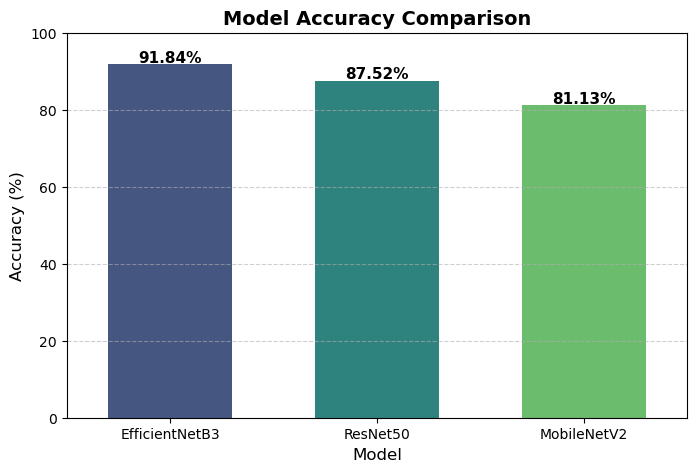

In [7]:
# 📊 Model Accuracy Comparison + Visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==== Model accuracies (example values, apni update kar sakti ho) ====
accuracies = {
    'Model': ['EfficientNetB3', 'ResNet50', 'MobileNetV2'],
    'Accuracy (%)': [91.84, 87.52, 81.13]
}

# Convert to DataFrame
df = pd.DataFrame(accuracies)

# ==== Show comparison table ====
print("📋 Model Accuracy Comparison Table:\n")
print(df.to_string(index=False))

# ==== Visualization ====
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy (%)', data=df, palette='viridis', width=0.6)

# Add accuracy values on top of bars
for i, acc in enumerate(df['Accuracy (%)']):
    plt.text(i, acc + 0.5, f"{acc:.2f}%", ha='center', fontsize=11, fontweight='bold')

plt.title("Model Accuracy Comparison", fontsize=14, fontweight='bold')
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
